## Boundary layer equation

$g = g(\eta)$.

$$2g^{\prime\prime\prime} + gg^{\prime\prime} = 0,$$

$$g^{\prime}(0) = 0,$$
$$g(0) = 0,$$
$$h(\infty)=1.$$

Let $h=g^{\prime}$ and $k=h^{\prime}$.

<font color="blue">
\begin{align}
k^{\prime} &= -\frac{1}{2}gk,\\
h^{\prime} &= k, \\
g^{\prime} &= h.
\end{align}
</font>

This set of equations has boundary conditions:
<font color="blue">
$$h(0) = 0,$$
$$g(0) = 0,$$
$$h(\infty) = 1.$$
</font>

Solve with a shooting method.
* Guess $k(0)$, shoot for $h(\infty)=1$.
* Then $u(\eta)/U_{\infty} = h(\eta)$.
* Also, $\eta = y/\delta$, where $\delta = \sqrt{L\nu/U_{\infty}}$.
    * So, $u = u(y)$.

In [10]:
import Plots as plt
using NLsolve
using DifferentialEquations
using LaTeXStrings

k0 =0.3320571486364569

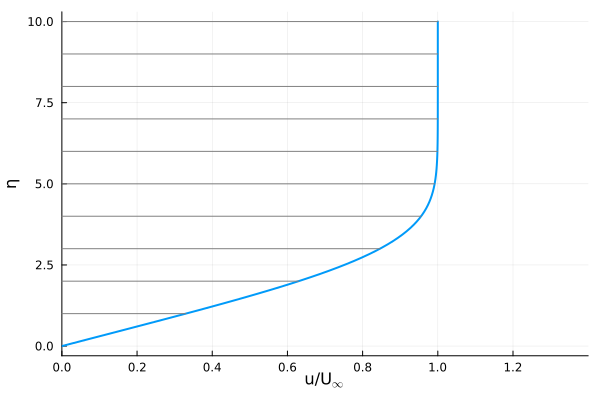

In [54]:
function odeRHS!(dkhg_dη, khg, params, t)
    k = khg[1]
    h = khg[2]
    g = khg[3]
    dkdη = -0.5*g*k
    dhdη = k
    dgdη = h
    dkhg_dη[1] = dkdη
    dkhg_dη[2] = dhdη
    dkhg_dη[3] = dgdη
end

function F_shooting!(Fval, k0)
    khg0 = [k0[1], 0.0, 0.0]
    ηspan = [0.0, 10]
    params = [1]
    odeprob = ODEProblem(odeRHS!, khg0, ηspan, params)
    sol = solve(odeprob)
    Fval[1] = sol(ηspan[end])[2] - 1.0
end

#-------------- Find k0

k0g  = 0.0
results = nlsolve(F_shooting!, [k0g])
k0 = results.zero[1]
print("k0 =$k0")

#-------------- Now solve ODE with given Tr0

khg0  = [0.332057, 0.0, 0.0]
ηspan = [0.0, 10]
params = [1]
odeprob = ODEProblem(odeRHS!, khg0, ηspan, params)
sol = solve(odeprob)
khg = vcat(sol.u'...)

η = sol.t
h = khg[:,2]

#-------------- Plot the result

# interpolate solution to get more points
η = LinRange(ηspan..., 100)
h = [sol(η[i])[2] for i in 1:length(η)]

plt.plot(h,η, lw=2)
plt.plot!(xlabel=L"u/U$_\infty$", ylabel="η")
p=plt.plot!(xlim=[0,1.4], legend=nothing)
for i in 1:10      # draw flow lines
    p = plt.plot!([0,sol(i)[2]], [i,i], color="gray")
end
display(p)